# Comparison of Convolutional Neural Networks (CNN) Architectures

This notebook requires a little or moderate experience with CNNs. A great introductory notebook to CNNs is [Deep Learning and Convolutional Neural Networks](https://github.com/erachelson/MLclass/blob/master/7%20-%20Deep%20Learning/Deep%20Learning%20and%20CNN.ipynb) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

This tutorial will use Keras as API - a minimalist, modular neural network library - and Tensorflow as backend. It requires internet connection. Google colab is advised since this notebook uses tensorflow 2.x and train a CNN.


## Introduction

Convolutional Neural Networks (or CNNs or ConvNets) is a family of artificial neural networks (ANN) built basically by stacking Convolutional/Pooling blocks upon each other and adding a final set of dense layers. Even though ANNs and CNNs architectures are very similar, ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network. 

State of the art ConvNets uses different blocks and connection between layers and are usually very deep, although depth does not correlate with performance. In this notebook, you will get familiar with the principal ConvNets architectures of the literature, as well as how to implement them and how they perform in a single example and in a standardized dataset.





## Summary

* Architecture basics
* Benchmark and Deep Learning Challenge
* Important (and Famous) Architectures
* Comparison between Principal Architectures
* Analysis
* Feature Extraction and Training
* Conclusions
* Further Reading

## I. Architecture Basics


### Layers

A classical ConvNet is built through a sequence of familiar layers as shown in the list below. Each architecture combine these layers in order to obtain the best performance for a certain class of problems and benchmarks.  

* Input Layer (INPUT)
* Convolutional Layer (most computationally demanding) (CONV)
* Pooling Layer (POOL)
* Fully-Connected Layer (FC)
 


#### Conv Layer Hyperparameters

Usually we want the output volume of the convolutional layer to have the same height and width of the input image. For controlling this, three hyperparameters are important.

* Depth ($K$):  corresponds to the number of filters we would like to use, each learning to look for something different in the input. For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edges, or blobs of color. 
* Stride ($S$): the amount the filter slides.  When the stride is 1 then we move the filters one pixel at a time.
* Zero-padding ($P$): The amount of zeros which will be added around the border of the input volume.
* Receptive field size ($F$): 

An important formula used often to design architectures and how many neurons fit the Conv Layer is given by 

$V = (W−F+2P)/S+1$

where $V$ is the Output Volume Size and $W$ is the Input Size. They must be integers.

![Convolution](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_5.png)

Figure 1. Illustration of the operations in a convolutional layer. [Source](https://blog.xrds.acm.org/2016/06/convolutional-neural-networks-cnns-illustrated-explanation/)

This [calculator](https://madebyollin.github.io/convnet-calculator/) may help when designing ConvNet layers.



#### Pooling Layer

Its function is to progressively reduce the size of the volume representation, the amount of parameters and computations in the network. Hence, they are key to control overfitting. It is common to periodically insert a Pooling layer in-between successive Conv layers.

Their design Requires two hyperparameters:

* Spatial extent ($F$)
* Stride ($S$)

In practice, the Max Pooling Layer has proven to work better than the Average and L2-norm one. There are only two commonly seen variations of the max pooling layer: a pooling layer with $F=3$, $S=2$ (also called *overlapping pooling*), and more commonly $F=2$, $S=2$.

![Pooling](https://cdn-media-1.freecodecamp.org/images/96HH3r99NwOK818EB9ZdEbVY3zOBOYJE-I8Q).

Figure 2. Illustration of the operation done by a pooling layer in a 2D representation. [Source](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/)

---

If you are not familiar with one of these concepts, jump to this [tutorial](http://cs231n.github.io/convolutional-networks/) as a reference and check tout his [tool](http://setosa.io/ev/image-kernels/) about image kernels.

### Layer Patterns

The most common form of a ConvNet architecture stacks a few CONV-RELU layers, follows them with POOL layers, and repeats this pattern until the image has been merged spatially to a small size. In the end, it is common to transition to fully-connected layers. The last fully-connected layer holds the output, such as the class scores. Some examples are listed below.

INPUT -> CONV -> RELU -> FC

INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC

INPUT -> [CONV -> RELU -> CONV -> RELU -> POOL]*3 -> [FC -> RELU]*2 -> FC


![LeNet](https://miro.medium.com/max/1221/1*aQA7LuLJ2YfozSJa0pAO2Q.png)

Figure 3. Illustration of the first convolutional network, LeNet-5.  [Source](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)

<!-- ## Rules of Thumb for designing your own CNN Architecture

Observing the presented CNNs, we can observe some patterns and suggest some rules of thumb for designing conv nets.

For instance, the input layer (that contains the image) should be divisible by 2 many times. Common numbers include 32 (e.g. CIFAR-10), 64, 96 (e.g. STL-10), or 224 (e.g. common ImageNet ConvNets), 384, and 512.

The conv layers should be using small filters (e.g. 3x3 or at most 5x5), using a stride of S=1, and crucially, padding the input volume with zeros in such way that the conv layer does not alter the spatial dimensions of the input. That is, when F=3, then using P=1 will retain the original size of the input. When F=5, P=2. For a general F, it can be seen that P=(F−1)/2 preserves the input size. If you must use bigger filter sizes (such as 7x7 or so), it is only common to see this on the very first conv layer that is looking at the input image.

The pool layers are in charge of downsampling the spatial dimensions of the input. The most common setting is to use max-pooling with 2x2 receptive fields (i.e. F=2), and with a stride of 2 (i.e. S=2). Note that this discards exactly 75% of the activations in an input volume (due to downsampling by 2 in both width and height). Another slightly less common setting is to use 3x3 receptive fields with a stride of 2, but this makes. It is very uncommon to see receptive field sizes for max pooling that are larger than 3 because the pooling is then too lossy and aggressive. This usually leads to worse performance.

---

[Great ressource for experimenting your architecture](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html) -->



## II. Benckmark and Deep Learning Challenge

### [**ImageNet Large Scale Visual Recognition Challenge (ILSVRC)**](http://www.image-net.org/challenges/LSVRC/)

The ImageNet project is a large visual database designed for use in visual object recognition software research. More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided. ImageNet contains more than 20,000 categories. Since 2010, the ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes. The challenge uses a "trimmed" list of one thousand non-overlapping classes. [1]

### Significance for deep learning

On 30 September 2012, a convolutional neural network (CNN) called AlexNet achieved a top-5 error of 15.3% in the ImageNet 2012 Challenge, more than 10.8 percentage points lower than that of the runner up. This was made feasible due to the use of Graphics processing units (GPUs) during training, an essential ingredient of the deep learning revolution. According to The Economist, "Suddenly people started to pay attention, not just within the AI community but across the technology industry as a whole." [1]

---
1. [Wikipedia article about ImageNet](https://en.wikipedia.org/wiki/ImageNet)

2. [ImageNet dataset classes](https://github.com/Lasagne/Recipes/blob/master/examples/resnet50/imagenet_classes.txt)




## II. Famous Architectures

[**LeNet**](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf): The first successful applications of Convolutional Networks were developed by Yann LeCun in 1990's. 

LeNet-5 represents one of the simplest architectures. It has 2 convolutionary and 3 fully connected layers (thus "5" — it is very common to derive the names of neural networks from the number of convolutionary and fully connected layers they possess). The architecture has a number parameters of about 60,000.

This architecture has become the traditional 'template': the stacking of convolutions and pooling layers, and the termination of the network with one or more fully-connected layers.

[**AlexNet**](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf): The first work that popularized Convolutional Networks in Computer Vision was the AlexNet, developed by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton. The AlexNet was submitted to the ImageNet ILSVRC challenge in 2012 and significantly outperformed the second runner-up.

AlexNet has 8 layers — 5 convolutionary and 3 fully connected — with 60 M parameters. AlexNet only piled onto LeNet-5 a few more layers.

They were the first to implement Rectified Linear Units (ReLUs) as activation functions.

![](https://miro.medium.com/max/1564/1*2DT1bjmvC-U-lrL7tpj6wg.png)
Figure 4. Illustration of the AlexNet architecture.

[**GoogLeNet/Inception**](https://arxiv.org/pdf/1409.4842.pdf): The ILSVRC 2014 winner was a Convolutional Network from Szegedy et al. from Google. 

The network used a LeNet-inspired CNN but added a novel feature that is called an inception module. It used normalization of the array, distortions of images and RMSprop. To significantly reduce the number of parameters, this module is based on several very small convolutions.

Its architecture consists of a 22-layer deep CNN but reduced the number of parameters from 60 million (AlexNet) to 4 million. A illustration of a variation of the Inception net is in the follwing sub-sections.

[**VGGNet**](https://arxiv.org/pdf/1409.1556.pdf): The runner-up in ILSVRC 2014 was the network from Karen Simonyan and Andrew Zisserman that became known as the VGGNet.

Knwoing that the best way to improve the efficiency of a deep neural networks is by increasing its scale (Szegedy et. al), the Visual Geometry Group (VGG) people created the VGG-16. It has 13 convolutionary and 3 fully connected layers, taking AlexNet's ReLU tradition with them. This network stacks on AlexNet more layers and uses filters of smaller sizes (2x2 and 3x3).

[**ResNet**](https://arxiv.org/pdf/1603.05027.pdf): The Residual Networks was developed by Kaiming He et al. and was the winner of the ILSVRC 2015.

We've seen nothing but an increasing number of layers in the design from the past few CNNs, and achieving better results. Yet "with increasing network size, accuracy gets saturated (which might be unsurprising) and then degrades quickly." Microsoft Research people addressed this issue with ResNet — using skip connections (i.e. shortcut connections).

ResNets' basic building block is the conv and identity blocks. In total it has 26M parameters. In terms of contribution, they popularised skip connections, designed even deeper CNNs without losing the generalization capacity of the model (up to 152 layers) and were among the first to use batch normalization.

![Skip-connection](https://miro.medium.com/max/713/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

Figure 5. An example of a skip connection in a single residual block. [Source](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec)

[**MobileNet**](https://arxiv.org/pdf/1704.04861.pdf): MobileNet was created by Google. Depthwise Separable Convolution is used to reduce the model size and complexity. It is particularly useful for mobile and embedded vision applications.

A Depthwise Separable Convolution deals not just with the spatial dimensions, but with the depth dimension — the number of channels — as well. Sometimes it is easier to see than to say. The two following images illustrates normal convolution and depth wise convolution, respectively.

![normal-conv](https://miro.medium.com/max/1523/1*fgYepSWdgywsqorf3bdksg.png)

Figure 6.  A normal convolution with 8x8x1 output. [Source](https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728)

![Depth-wise-conv](https://miro.medium.com/max/1635/1*yG6z6ESzsRW-9q5F_neOsg.png)

Figure 7. Depthwise convolution, uses 3 kernels to transform a 12x12x3 image to a 8x8x3 image. [Source](https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728)

By separating the convolution in two parts, it has a smaller model size (fewer number of parameters) and a smaller complexity (fewer multiplications and additions). When 1.0 MobileNet-224 is used, it outperforms GoogLeNet (Winner of ILSVRC 2014) and VGGNet (1st Runner Up of ILSVRC 2014) while the multi-adds and parameters are much fewer. The two part spatial separable convolution is illustrated below.

![](https://miro.medium.com/max/1548/1*o3mKhG3nHS-1dWa_plCeFw.png)

Figure 8. Simple and spatial separable convolution. 9 operations vs 6 operations. [Source](https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728)


---

In this notebook we will compare in more detail the following CNNs architectures:

* Variation of the **VGGNet** (VGG-16)
* Variation of the **ResNet** (ResNet-50)
* Variation of the **GoogLeNet/Inception** (Inception-ResNet-V2)

And train a **MobileNetV2** to classify dogs and cats with feature extraction.

Note the amount of trainable parameters in the networks. To train it on a simple machine would take ... $\infty$. That is why we are going to load a pre-trained weights and then do the predictions.

**Let's code!**


#### Load example pictures to test the CNNs

In [1]:
# Load an example picture from Google Drive
!pip install gdown
# Examples
!gdown --id 1ZsZZgzC1ppe02x2AvVw6b0dmTDFVEYH6
!unzip examples.zip > output1.txt

Downloading...
From: https://drive.google.com/uc?id=1ZsZZgzC1ppe02x2AvVw6b0dmTDFVEYH6
To: /content/examples.zip
100% 439k/439k [00:00<00:00, 63.2MB/s]


### VGG-16

In this section we will load the VGG-16 convnet with the pre-trained weights and classifier (include_top) and try to classify a picture example. 

![](https://miro.medium.com/max/1799/1*_vGloND6yyxFeFH5UyCDVg.png)
Figure 9. Illustration of the VGG-16 architecture based on the original paper. [Source](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d#6872)

In [2]:
# Ignore tf versioning warnings
import warnings
warnings.filterwarnings('ignore')
# VGG
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.applications import VGG16
# Load the model with the top classifier
vgg16 = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3),
                  classes=1000)
vgg16.summary()

TensorFlow 2.x selected.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 

 airliner (49.96%)


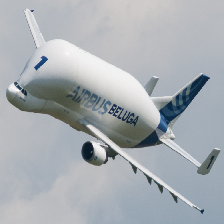

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
# Pre proccess the input and predic result
def predict_example(model, directory='',filename='beluga.jpg', name=""):
    # load an image from file
    figure = load_img(directory+filename, target_size=(224,224))
    # convert the image pixels to a numpy array
    image = img_to_array(figure)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print(name, '%s (%.2f%%)' % (label[1], label[2]*100))
    return figure

# Your time to play
predict_example(vgg16, filename='beluga.jpg')
# There are over 1000 different classes available

### ResNet-50

We will do the same thing for the ResNet-50.

![altext](https://miro.medium.com/max/2368/1*zbDxCB-0QDAc4oUGVtg3xw.png)

Figure 10. Illustration of the ResNet-50 architecture based on the GitHub [code](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet_common.py) from keras-team. [Source](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d#e4b1)

In [4]:
warnings.filterwarnings('ignore')
# ResNet
from tensorflow.keras.applications import ResNet50
resnet50 = ResNet50(weights='imagenet',
                include_top=True,
                input_shape=(224, 224, 3),
                classes=1000)
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

 airliner (76.21%)


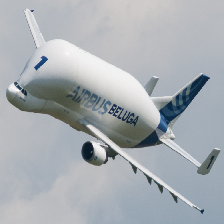

In [5]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# Your time to play
predict_example(resnet50, filename='beluga.jpg')
# Remember, there are over 1000 available classes

### Inception-ResNet-V2

And the same for the variation of the Inception network.

![alttext](https://miro.medium.com/max/3125/1*xpb6QFQ4IknSmxmgai8w-Q.png)

Figure 11. Illustration of the Inception-ResNet-V2 architecture. [Source](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d#e4b1)


In [6]:
warnings.filterwarnings('ignore')
# GoogleLeNet/Inception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
inception = InceptionResNetV2(weights='imagenet',
                include_top=True,
                input_shape=(299, 299, 3), # The input shape for this convnet is different
                classes=1000)
inception.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

 airliner (84.81%)


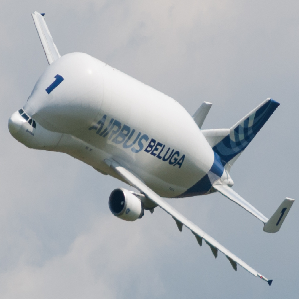

In [7]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
def predict_example_inception(model, directory='',filename='2.jpg', name=""):
    figure = load_img(directory+filename, target_size=(299,299))
    image = img_to_array(figure)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    yhat = model.predict(image)
    label = decode_predictions(yhat)[0][0]
    print(name, '%s (%.2f%%)' % (label[1], label[2]*100))
    return figure
predict_example_inception(inception,filename='beluga.jpg')

#### Playground

Feel free to upload your own pictures and compare single example performance between the networks.

VGG-16 jeep (58.18%)
ResNet-50 jeep (33.70%)
InceptionResNetV2 amphibian (24.76%)


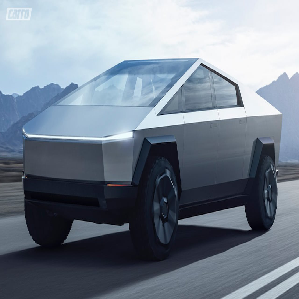

In [8]:
filename = 'truck.jpg'
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
predict_example(vgg16, directory="", filename=filename, name="VGG-16", )
predict_example(resnet50, directory="", filename=filename, name="ResNet-50")
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
predict_example_inception(inception, directory="", filename=filename, name="InceptionResNetV2")

## Comparison of Principal Architectures

The following table show some data for several state of the art CNN architectures. This data is made available by the Keras team in [their documentation](https://keras.io/applications/). We will use this data to create graphs and drive conclusions from the different architectures. 

<hr />
<table>
<thead>
<tr>
<th>Model</th>
<th align="right">Size</th>
<th align="right">Top-1 Accuracy</th>
<th align="right">Top-5 Accuracy</th>
<th align="right">Parameters</th>
<th align="right">Depth</th>
</tr>
</thead>
<tbody>
<tr>
<td>AlexNet </td>
<td align="right">60 MB</td>
<td align="right">0.633</td>
<td align="right">0.847</td>
<td align="right">60,954,656</td>
<td align="right">8</td>
</tr>
<tr>
<td>Xception </td>
<td align="right">88 MB</td>
<td align="right">0.790</td>
<td align="right">0.945</td>
<td align="right">22,910,480</td>
<td align="right">126</td>
</tr>
<tr>
<td>VGG16 </td>
<td align="right">528 MB</td>
<td align="right">0.713</td>
<td align="right">0.901</td>
<td align="right">138,357,544</td>
<td align="right">23</td>
</tr>
<tr>
<td>VGG19 </td>
<td align="right">549 MB</td>
<td align="right">0.713</td>
<td align="right">0.900</td>
<td align="right">143,667,240</td>
<td align="right">26</td>
</tr>
<tr>
<td>ResNet50 </td>
<td align="right">98 MB</td>
<td align="right">0.749</td>
<td align="right">0.921</td>
<td align="right">25,636,712</td>
<td align="right">50</td>
</tr>
<tr>
<td>ResNet101 </td>
<td align="right">171 MB</td>
<td align="right">0.764</td>
<td align="right">0.928</td>
<td align="right">44,707,176</td>
<td align="right">101</td>
</tr>
<tr>
<td>ResNet152 </td>
<td align="right">232 MB</td>
<td align="right">0.766</td>
<td align="right">0.931</td>
<td align="right">60,419,944</td>
<td align="right">512</td>
</tr>
<tr>
<td>ResNet50V2 </td>
<td align="right">98 MB</td>
<td align="right">0.760</td>
<td align="right">0.930</td>
<td align="right">25,613,800</td>
<td align="right">50</td>
</tr>
<tr>
<td>ResNet101V2 </td>
<td align="right">171 MB</td>
<td align="right">0.772</td>
<td align="right">0.938</td>
<td align="right">44,675,560</td>
<td align="right">101</td>
</tr>
<tr>
<td>ResNet152V2 </td>
<td align="right">232 MB</td>
<td align="right">0.780</td>
<td align="right">0.942</td>
<td align="right">60,380,648</td>
<td align="right">512</td>
</tr>
<tr>
<td>InceptionV3 </td>
<td align="right">92 MB</td>
<td align="right">0.779</td>
<td align="right">0.937</td>
<td align="right">23,851,784</td>
<td align="right">159</td>
</tr>
<tr>
<td>InceptionResNetV2 </td>
<td align="right">215 MB</td>
<td align="right">0.803</td>
<td align="right">0.953</td>
<td align="right">55,873,736</td>
<td align="right">572</td>
</tr>
<tr>
<td>MobileNet </td>
<td align="right">16 MB</td>
<td align="right">0.704</td>
<td align="right">0.895</td>
<td align="right">4,253,864</td>
<td align="right">88</td>
</tr>
<tr>
<td>MobileNetV2 </td>
<td align="right">14 MB</td>
<td align="right">0.713</td>
<td align="right">0.901</td>
<td align="right">3,538,984</td>
<td align="right">88</td>
</tr>
<tr>
<td>DenseNet121 </td>
<td align="right">33 MB</td>
<td align="right">0.750</td>
<td align="right">0.923</td>
<td align="right">8,062,504</td>
<td align="right">121</td>
</tr>
<tr>
<td>DenseNet169 </td>
<td align="right">57 MB</td>
<td align="right">0.762</td>
<td align="right">0.932</td>
<td align="right">14,307,880</td>
<td align="right">169</td>
</tr>
<tr>
<td>DenseNet201 </td>
<td align="right">80 MB</td>
<td align="right">0.773</td>
<td align="right">0.936</td>
<td align="right">20,242,984</td>
<td align="right">201</td>
</tr>
<tr>
<td>NASNetMobile </td>
<td align="right">23 MB</td>
<td align="right">0.744</td>
<td align="right">0.919</td>
<td align="right">5,326,716</td>
<td align="right">-</td>
</tr>
<tr>
<td>NASNetLarge </td>
<td align="right">343 MB</td>
<td align="right">0.825</td>
<td align="right">0.960</td>
<td align="right">88,949,818</td>
<td align="right">-</td>
</tr>
</tbody>
</table>
<hr />

**Size:** size of the network in memory.

**Top-1 Accuracy:** check if the top class (the one having the highest probability) is the same as the target label.

**Top-5 Accuracy:** check if the target label is one of your top 5 predictions (the 5 ones with the highest probabilities).

In both cases, the top score is computed as the times a predicted label matched the target label, divided by the number of data-points evaluated.

In [9]:
import pandas as pd

names = np.array(['AlexNet','Xception','VGG16','VGG19','ResNet50','ResNet101','ResNet152','ResNet50V2','ResNet101V2','ResNet152V2','InceptionV3','InceptionResNetV2','MobileNet','MobileNetV2','DenseNet121','DenseNet169','DenseNet201','NASNetMobile','NASNetLarge'])
sizes = np.array([60,88,528,549,98,171,232,98,171,232,92,215,16,14,33,57,80,23,343])
top_1_acc = np.array([0.633,0.79,0.713,0.713,0.749,0.764,0.766,0.76,0.772,0.78,0.779,0.803,0.704,0.713,0.75,0.762,0.773,0.744,0.825])
top_5_acc = np.array([0.847,0.945,0.901,0.9,0.921,0.928,0.931,0.93,0.938,0.942,0.937,0.953,0.895,0.901,0.923,0.932,0.936,0.919,0.96])
params = np.array([60954656,22910480,138357544,143667240,25636712,44707176,60419944,25613800,44675560,60380648,23851784,55873736,4253864,3538984,8062504,14307880,20242984,5326716,88949818])
top_1_acc_density = top_1_acc/params*10**6
colors = [np.random.rand(3,) for i in range(0,len(names))]
df = pd.DataFrame(data={'Names': names, 'Size (MB)':sizes, 'top_1_acc':top_1_acc, 
                        'top_5_acc':top_5_acc, 'Parameters':params, 'top_1_acc_density':top_1_acc_density,'col':colors})
df.head(5)

,Names,Size (MB),top_1_acc,top_5_acc,Parameters,top_1_acc_density,col
0,AlexNet,60,0.633,0.847,60954656,0.010385,"[0.29735650724619156, 0.908240668595161, 0.145..."
1,Xception,88,0.790,0.945,22910480,0.034482,"[0.5197794776603991, 0.5702391973679356, 0.389..."
2,VGG16,528,0.713,0.901,138357544,0.005153,"[0.48509895635241906, 0.9510286031950473, 0.32..."
3,VGG19,549,0.713,0.900,143667240,0.004963,"[0.6147256839078921, 0.44295943120703374, 0.32..."
4,ResNet50,98,0.749,0.921,25636712,0.029216,"[0.31722230060246426, 0.7461043948164303, 0.88..."


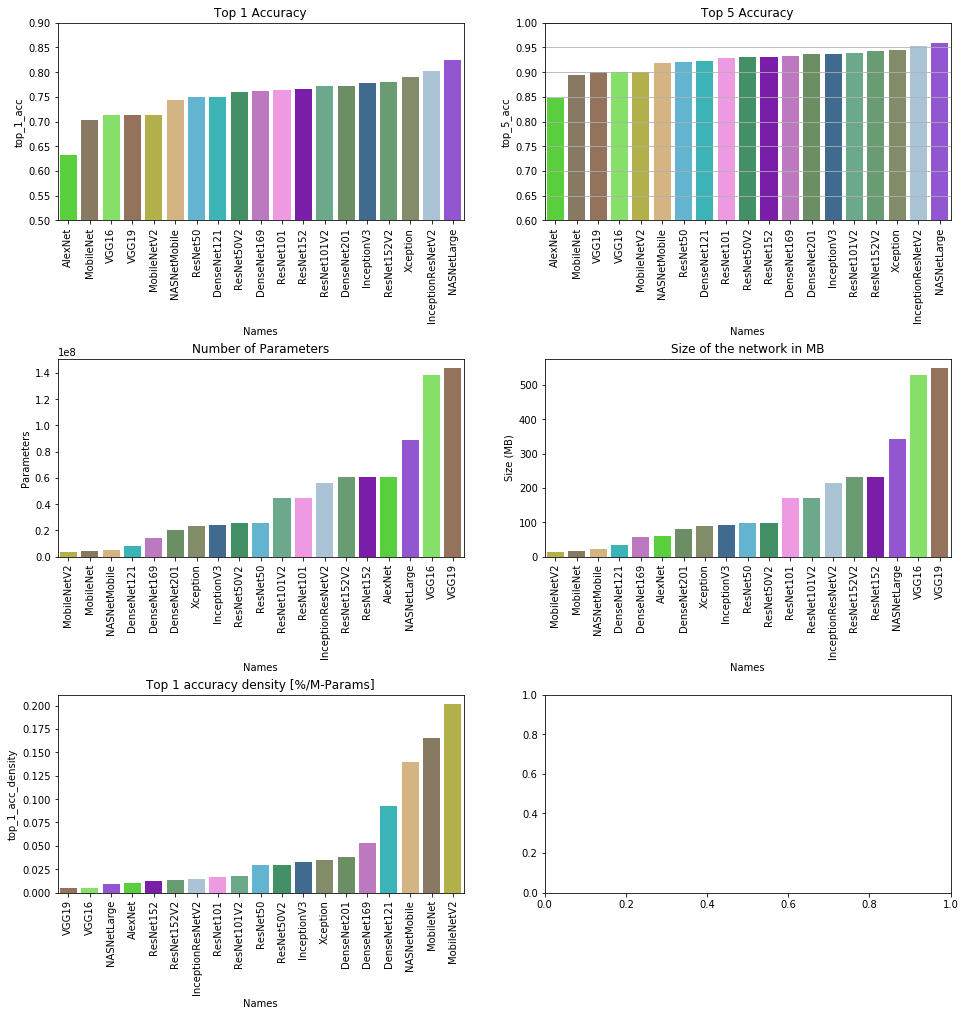

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(3,2,figsize=(16,16))
plt.subplots_adjust(hspace=0.7)
ax[0][0].set_title('Top 1 Accuracy')
plt.sca(ax[0][0])
plt.ylim([0.5,0.9])
g = sns.barplot(x='Names', y='top_1_acc', data=df.sort_values('top_1_acc'), palette=df.sort_values('top_1_acc')['col'], ax=ax[0][0])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax[0][1].set_title('Top 5 Accuracy')
plt.sca(ax[0][1])
plt.ylim([0.6,1])
g = sns.barplot(x='Names', y='top_5_acc', data=df.sort_values('top_5_acc'),  palette=df.sort_values('top_5_acc')['col'], ax=ax[0][1])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax[1][0].set_title('Number of Parameters')
g = sns.barplot(x='Names', y='Parameters', data=df.sort_values('Parameters'),palette=df.sort_values('Parameters')['col'], ax=ax[1][0])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax[1][1].set_title('Size of the network in MB')
g = sns.barplot(x='Names', y='Size (MB)', data=df.sort_values('Size (MB)'), palette=df.sort_values('Size (MB)')['col'], ax=ax[1][1])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax[2][0].set_title('Top 1 accuracy density [%/M-Params]')
g = sns.barplot(x='Names', y='top_1_acc_density', data=df.sort_values('top_1_acc_density'), palette=df.sort_values('top_1_acc_density')['col'], ax=ax[2][0])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

## Feature Extraction (Optional)

In this section we will use all the power of Keras application to train a state of the art cnn to classify cats and dogs. For doing so we will use a technique called Feature Extraction.

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. Go to [their documentation](https://keras.io/applications/) for reference.

Since the imagenet dataset is too big, with more than 150GB and 1000 classes, we are going to adapt the CNNs from Keras Application to distinguish cats and dogs on our own dataset. For doing this, we will conserve the convolutinal base of the networks and train a novel classifier.

![alttext](https://camo.githubusercontent.com/2de162f6f3587a0422389355909594413ae17742/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368352f7377617070696e675f66635f636c61737369666965722e706e67)

Figure 12. Illustration of how a feature extraction application work in keras. The model consists of a "convolutional base" and a "top" part where there is the densely connected classifier for 1000 different classes.

---

This subsection is based on [this](https://www.tensorflow.org/tutorials/images/transfer_learning) notebook from François Chollet, developper of Keras.

This part is preferably run in Google Colab, since it requires tensorflow 2.x.


### Loaf tensorflow dataset cats_vs_dogs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs', split=list(splits),
    with_info=True, as_supervised=True)

In [13]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


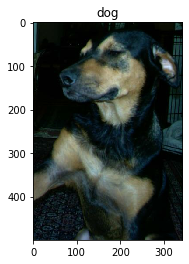

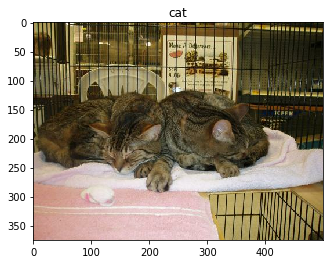

In [14]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

### Format the Data

In [0]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

Apply this function to each item in the dataset using the map method:

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Now shuffle and batch the data.

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [0]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [19]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2 (Convolutional base)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

This feature extractor converts each `160x160x3` image into a `5x5x1280` block of features. This block then will be inputed in our classifier.

In [21]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Freeze the convolutional base

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all the layers.

In [22]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

### Add a classification top

To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  Positive numbers predict class 1, negative numbers predict class 0.

In [26]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Now stack the feature extractor, and these two layers using a `tf.keras.Sequential` model:

In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

### Compile the model

You must compile the model before training it.  Since there are two classes, use a binary cross-entropy loss with `from_logits=True` since the model provides a linear output.

In [28]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


The 2.5M parameters in MobileNet are frozen, but there are 1.2K _trainable_ parameters in the Dense layer. 


### Train the model

After training for 10 epochs, you should see ~96% accuracy.


In [29]:
num_train, num_val, num_test = (
    metadata.splits['train'].num_examples*weight/10
    for weight in SPLIT_WEIGHTS
)
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 3s 153ms/step - loss: 0.5706 - accuracy: 0.6391
initial loss: 0.57
initial accuracy: 0.64


In [30]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 51s 87ms/step - loss: 0.3337 - accuracy: 0.8426 - val_loss: 0.1824 - val_accuracy: 0.9022
Epoch 2/10
582/582 [==============================] - 49s 84ms/step - loss: 0.1965 - accuracy: 0.9186 - val_loss: 0.1411 - val_accuracy: 0.9254
Epoch 3/10
582/582 [==============================] - 50s 85ms/step - loss: 0.1661 - accuracy: 0.9301 - val_loss: 0.1283 - val_accuracy: 0.9328
Epoch 4/10
582/582 [==============================] - 51s 87ms/step - loss: 0.1482 - accuracy: 0.9389 - val_loss: 0.1234 - val_accuracy: 0.9409
Epoch 5/10
582/582 [==============================] - 50s 87ms/step - loss: 0.1375 - accuracy: 0.9426 - val_loss: 0.1167 - val_accuracy: 0.9466
Epoch 6/10
582/582 [==============================] - 50s 86ms/step - loss: 0.1365 - accuracy: 0.9439 - val_loss: 0.1146 - val_accuracy: 0.9474
Epoch 7/10
582/582 [==============================] - 49s 85ms/step - loss: 0.1333 - accuracy: 0.9449 - val_loss: 0.1075 - val_accuracy:

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

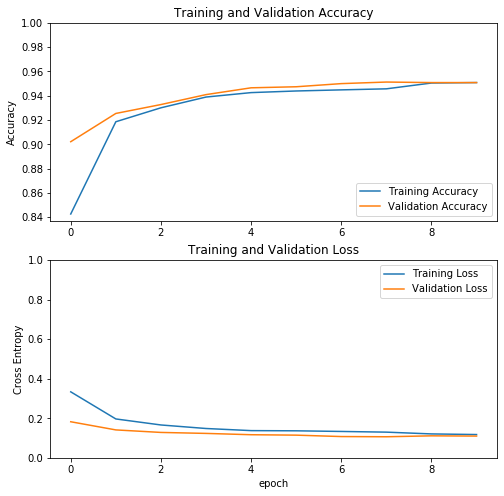

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In addition you could perform a fine tuning in the weights of the convolutional layers, improving even more the performance of the CNN.

## Conclusions

Instead of rolling your own architecture for a problem, you should look at whatever architecture currently works best on ImageNet, download a pretrained model and finetune it on your data. You should rarely ever have to train a ConvNet from scratch or design one from scratch.


Convnets are the best type of machine learning models for computer vision tasks. It is possible to train one from scratch even on a very small dataset, with decent results.

On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when working with image data.

It is easy to reuse an existing convnet on a new dataset, via feature extraction. This is a very valuable technique for working with small image datasets.

As a complement to feature extraction, one may use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.

Now you have a solid set of tools for dealing with image classification problems.

---
Further Reading:

* [An Analysis of Deep Neural Network Models for Practical Applications](https://arxiv.org/pdf/1605.07678.pdf)
